In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
df_ticket = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\ticket_history.csv')
df_customer = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\customer.csv')
df_campaign = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\campaign.csv')
df_status = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\status_detail.csv')
df_device = pd.read_csv(r'C:\Users\hueok\Desktop\Py learning\MovieTicket\device_detail.csv')

## Kiểm tra Data type, giá trị Unique, Null và Duplicate

In [3]:
# Definition

#Kiểm tra giá trị unique và null
def unique_null(df):
    object_columns = df.columns

    print(f"{'Column':30} | {'Unique':>6} | {'Non-null':>8} | {'Nulls':>6} | {'% Non-null':>10}")
    print("-" * 80)

    for col in object_columns:
        unique_vals = df[col].nunique(dropna=True)
        non_nulls = df[col].notnull().sum()
        nulls = df[col].isnull().sum()
        pct = round(non_nulls / len(df) * 100, 2)

        print(f"{col[:30]:30} | {unique_vals:6} | {non_nulls:8} | {nulls:6} | {pct:10.2f}%")

#Kiểm tra giá trị specific trong các cột
def specific_cols(df, col):
    for column in col:
        print("-" * 100)
        print(f"*, Column: {column}")
        print(df[column].value_counts(dropna=False))  # Include NaNs if any
        print("-" * 100)


In [4]:
#Data type, NULL values, duplicate values

#df_device
df_device.head()
df_device.info()
unique_null(df_device)
specific_cols(df_device, ['platform'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB
Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
device_number                  | 139901 |   139901 |      1 |     100.00%
model                          |   1260 |   132763 |   7139 |      94.90%
platform                       |      2 |   139902 |      0 |     100.00%
----------------------------------------------------------------------------------------------------
*, Column: platform
platform
mobile     123088
website     16814
Name: count, dtype: int64
--------------------------------------------------------------

In [5]:
df_device = df_device.fillna('unknown')
unique_null(df_device)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
device_number                  | 139902 |   139902 |      0 |     100.00%
model                          |   1261 |   139902 |      0 |     100.00%
platform                       |      2 |   139902 |      0 |     100.00%


In [6]:
df_status

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please...,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect atte...,customer
5,-5,Payment failed from bank,external
6,-6,Need verify your account to continue,customer
7,-7,Transaction temporarily limited,internal


In [7]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [8]:
unique_null(df_status)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
status_id                      |      8 |        8 |      0 |     100.00%
description                    |      8 |        8 |      0 |     100.00%
error_group                    |      3 |        7 |      1 |      87.50%


In [9]:
df_status[df_status['error_group'].isnull()]

,status_id,description,error_group
0,1,Order successful,NaN


In [10]:
specific_cols(df_status,['error_group'])

----------------------------------------------------------------------------------------------------
*, Column: error_group
error_group
customer    4
external    2
NaN         1
internal    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [11]:
df_campaign.head()

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [12]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [13]:
unique_null(df_campaign)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
campaign_id                    |    216 |      216 |      0 |     100.00%
campaign_type                  |      3 |      216 |      0 |     100.00%


In [14]:
specific_cols(df_campaign,['campaign_type'])

----------------------------------------------------------------------------------------------------
*, Column: campaign_type
campaign_type
voucher            142
direct discount     72
reward point         2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [15]:
df_customer.head(5)

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [16]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [17]:
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [18]:
unique_null(df_customer)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
customer_id                    | 131400 |   131400 |      0 |     100.00%
usergender                     |      3 |   131400 |      0 |     100.00%
dob                            |  11640 |   131400 |      0 |     100.00%


In [19]:
df_ticket.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [20]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [21]:
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [22]:
unique_null(df_ticket)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
ticket_id                      | 154725 |   154827 |      0 |     100.00%
customer_id                    | 119477 |   154827 |      0 |     100.00%
paying_method                  |      5 |   154827 |      0 |     100.00%
theater_name                   |    179 |   154827 |      0 |     100.00%
device_number                  | 126459 |   154827 |      0 |     100.00%
original_price                 |   1895 |   154827 |      0 |     100.00%
discount_value                 |    242 |   154827 |      0 |     100.00%
final_price                    |   2715 |   154827 |      0 |     100.00%
time                           | 154725 |   154827 |      0 |     100.00%
status_id                      |      8 |   154827 |      0 |     100.00%
campaign_id                    |    211 |   154827 |      0 |     100.00%
movie_name                     |

In [23]:
154827-154725

102

In [24]:
df_ticket[df_ticket.duplicated(keep= False)]

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
...,...,...,...,...,...,...,...,...,...,...,...,...
150907,19157b98a57ed878fb487d8513c5990b,208867,bank account,109.0,52933d84749f4b41e9b3458f373e7022,5.36,2.52,2.84,2022-04-12 15:53:18.845,1,73240,Jujutsu Kaisen 0
150908,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150909,4faa45fb7a23cababb71aeac2f015101,219445,money in app,173.0,e9616839ada13b14ceeeb21fe19a43f9,10.31,4.62,5.69,2022-04-29 12:53:10.576,1,73240,Jujutsu Kaisen 0
150910,ee8873f48b7a45d5a979f0b425a95838,224834,money in app,119.0,957be8a5460e76997e6802bccd969511,20.62,4.62,16.00,2022-05-07 07:22:33.411,1,73240,Jujutsu Kaisen 0


In [25]:
df_ticket.drop_duplicates(inplace= True)

In [26]:
join_customer = pd.merge(df_ticket, df_customer, how= 'left', on = 'customer_id')
join_device = pd.merge(join_customer, df_device, how= 'left', on = 'device_number')
join_campaign = pd.merge(join_device, df_campaign, how= 'left', on = 'campaign_id')
join_all = pd.merge(join_campaign, df_status, how= 'left', on = 'status_id')

In [27]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  model           154647 non-null  obj

In [28]:
unique_null(join_all)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
ticket_id                      | 154725 |   154725 |      0 |     100.00%
customer_id                    | 119477 |   154725 |      0 |     100.00%
paying_method                  |      5 |   154725 |      0 |     100.00%
theater_name                   |    179 |   154725 |      0 |     100.00%
device_number                  | 126459 |   154725 |      0 |     100.00%
original_price                 |   1895 |   154725 |      0 |     100.00%
discount_value                 |    242 |   154725 |      0 |     100.00%
final_price                    |   2715 |   154725 |      0 |     100.00%
time                           | 154725 |   154725 |      0 |     100.00%
status_id                      |      8 |   154725 |      0 |     100.00%
campaign_id                    |    211 |   154725 |      0 |     100.00%
movie_name                     |

In [29]:
join_all = join_all.fillna('unknown')

# Analyze

## 1. Customer Portrait

### Age and gender distribution

In [30]:
join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,model,platform,campaign_type,description,error_group
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,"iPhone13,1",mobile,direct discount,Order successful,unknown
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,browser,website,direct discount,Order successful,unknown
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,mobile,unknown,Order successful,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,devicemodel,mobile,direct discount,Order successful,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,devicemodel,mobile,direct discount,Order successful,unknown


In [31]:
cur_day = datetime.now()
cur_day

datetime.datetime(2025, 7, 30, 14, 24, 53, 933728)

In [32]:
join_all['age'] = (cur_day - join_all['dob']).dt.days
join_all['age'] = join_all['age']/365
join_all['age'] = join_all['age'].astype(int)
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  model           154725 non-null  obj

In [33]:
df_cus = join_all[['customer_id', 'age', 'dob', 'usergender']].drop_duplicates()
unique_null(df_cus)

Column                         | Unique | Non-null |  Nulls | % Non-null
--------------------------------------------------------------------------------
customer_id                    | 119477 |   119477 |      0 |     100.00%
age                            |    103 |   119477 |      0 |     100.00%
dob                            |  11322 |   119477 |      0 |     100.00%
usergender                     |      3 |   119477 |      0 |     100.00%


In [34]:
df_cus

,customer_id,age,dob,usergender
0,100009,36,1989-02-25,Male
1,100493,34,1991-06-09,Male
2,100596,36,1989-05-18,Male
3,100852,27,1997-08-31,Male
4,100965,36,1988-09-20,Male
...,...,...,...,...
154720,194726,24,2001-01-21,Male
154721,211166,30,1995-05-05,Male
154722,211671,45,1980-05-19,Male
154723,223500,55,1970-01-01,Not verify


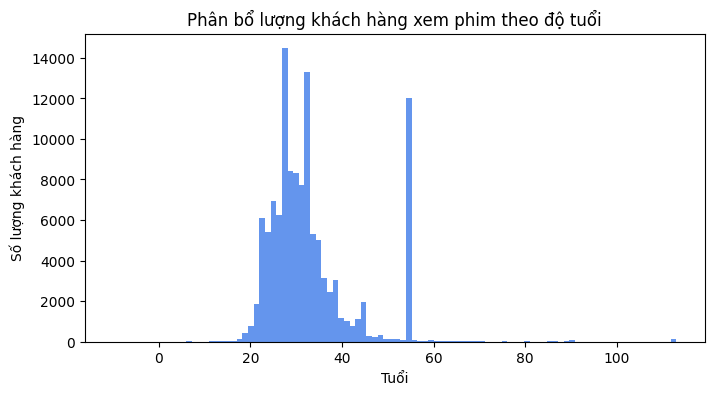

In [35]:
#Biểu đồ phân bổ lượng khách hàng theo độ tuổi
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins= 100, color = 'cornflowerblue', grid= False)
plt.title('Phân bổ lượng khách hàng xem phim theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng khách hàng')
plt.show()

<Axes: >

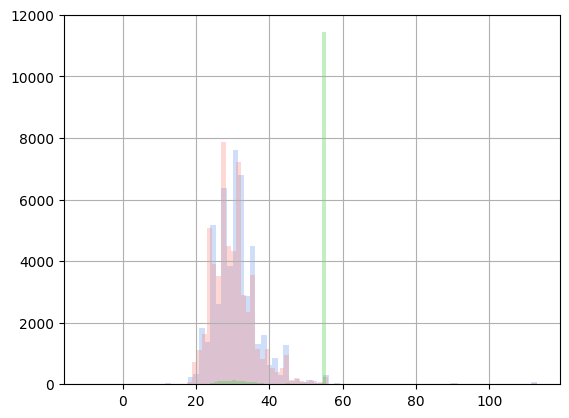

In [36]:
#Phân bổ lượng khách hàng theo giới tính
df_cus[df_cus['usergender'] == 'Male']['age'].hist(bins= 80, alpha = 0.3, color = 'cornflowerblue', label= 'Male')
df_cus[df_cus['usergender'] == 'Female']['age'].hist(bins= 80, alpha = 0.3, color = 'salmon', label= 'Female')
df_cus[df_cus['usergender'] == 'Not verify']['age'].hist(bins= 80, alpha = 0.3, color = 'limegreen', label= 'Not verify')

([<matplotlib.patches.Wedge at 0x26292a7d5e0>,
 [Text(-1.0937700247811786, 0.1169065134634527, 'Female'),
  Text(0.9923627447221103, -0.47456947108679465, 'Male'),
  Text(0.36641474570829957, 1.0371789788303283, 'Not verify')],
 [Text(-0.5966018316988245, 0.06376718916188329, '46.6%'),
  Text(0.5412887698484237, -0.2588560751382516, '42.6%'),
  Text(0.19986258856816339, 0.5657339884529062, '10.8%')])

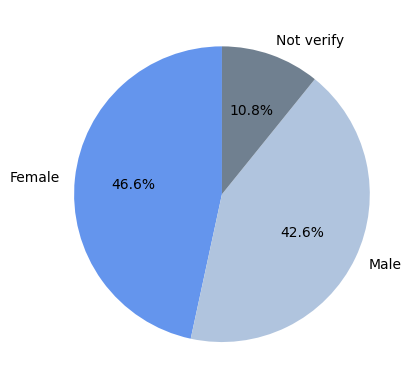

In [37]:
#Tỷ trọng khách hàng theo giới tính
df_gen = df_cus.groupby('usergender').agg(Total = ('customer_id', 'count')).reset_index()
plt.pie(df_gen['Total'],labels = df_gen['usergender'], colors= ['cornflowerblue','lightsteelblue','slategrey'], autopct= '%1.1f%%', startangle= 90)

In [38]:
#Kiểm tra thông tin nhóm Not Verify
df_not_verify = df_cus[df_cus['usergender'] == 'Not verify']
df_not_verify.groupby('age')['customer_id'].count().sort_values(ascending = False)
join_all[join_all['age']== 55]
df_cus[df_cus['age']== 55].count()
df_not_verify.count()
11927/12915

0.9234998064266356

11% người dùng chưa được xác thực, có 2 trường hợp:
+ Người dùng nhập DOB sẽ có dữ liệu
+ Người dùng không nhập DOB sẽ mặc định sinh năm 1970 -> 55 tuổi (chiếm 92% trên tổng số người dùng chưa xác thực)

### Age generation distribution

In [39]:
#Phân bổ khách hàng theo nhóm thế hệ

#Loại bỏ các khách hàng chưa được xác thực
df_cus = df_cus[df_cus['usergender'] != 'Not verify']
specific_cols(df_cus,['usergender'])


df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'Baby boomers' if x.year< 1965 else 'Gen X' if x.year< 1981 else 'Gen Y' if x.year< 1997 else 'Gen Z')
specific_cols(df_cus,['age_generation'])

df_generation = df_cus.groupby('age_generation').agg(Total = ('customer_id', 'count')).reset_index()
df_generation


----------------------------------------------------------------------------------------------------
*, Column: usergender
usergender
Female    55689
Male      50873
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column: age_generation
age_generation
Gen Y           63310
Gen Z           38401
Gen X            4261
Baby boomers      590
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


C:\Users\hueok\AppData\Local\Temp\ipykernel_2192\1956751624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'Baby boomers' if x.year< 1965 else 'Gen X' if x.year< 1981 else 'Gen Y' if x.year< 1997 else 'Gen Z')


,age_generation,Total
0,Baby boomers,590
1,Gen X,4261
2,Gen Y,63310
3,Gen Z,38401


([<matplotlib.patches.Wedge at 0x26292ab4b00>,
 [Text(-0.01913243777787231, 1.0998336009709269, 'Baby boomers'),
  Text(-0.17569316491234355, 1.0858784056251807, 'Gen X'),
  Text(-0.9190847340394431, -0.6043866739560414, 'Gen Y'),
  Text(0.995843146279652, 0.4672220328792768, 'Gen Z')],
 [Text(-0.010435875151566715, 0.5999092368932328, '0.6%'),
  Text(-0.09583263540673283, 0.5922973121591893, '4.0%'),
  Text(-0.5013189458396962, -0.32966545852147705, '59.4%'),
  Text(0.5431871706979919, 0.2548483815705146, '36.0%')])

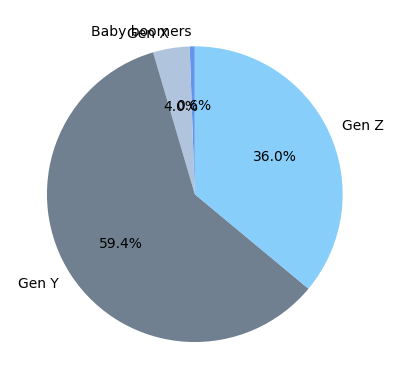

In [40]:
plt.pie(df_generation['Total'],labels = df_generation['age_generation'], colors= ['cornflowerblue','lightsteelblue','slategrey','lightskyblue'], autopct= '%1.1f%%', startangle= 90)

Text(0.5, 1.0, 'Phân bổ lượng khách hàng xem phim theo nhóm thế hệ')

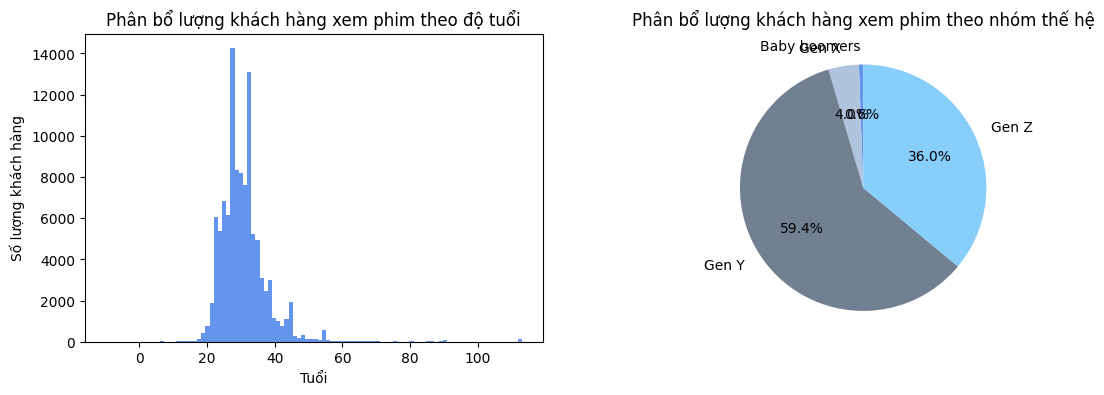

In [41]:
plt.figure(figsize= (13,4))

ax1 = plt.subplot(1,2,1)
df_cus[df_cus['usergender'] != 'Not verify']['age'].hist(bins= 100, color = 'cornflowerblue', grid= False)
plt.title('Phân bổ lượng khách hàng xem phim theo độ tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng khách hàng')

ax1 = plt.subplot(1,2,2)
explode = [0.1 if val < 10 else 0 for val in df_generation['Total']]
plt.pie(df_generation['Total'],labels = df_generation['age_generation'], colors= ['cornflowerblue','lightsteelblue','slategrey','lightskyblue'], autopct= '%1.1f%%', startangle= 90,labeldistance=1.15, explode=explode)
plt.title('Phân bổ lượng khách hàng xem phim theo nhóm thế hệ')

## Time series data - When did customers buy tickets?

In [42]:
join_all['month'] = pd.to_datetime(join_all['time']).dt.month
join_all['name_day'] = pd.to_datetime(join_all['time']).dt.day_name()
join_all['hour'] = pd.to_datetime(join_all['time']).dt.hour
join_all['month_year'] = join_all['time'].dt.strftime('%Y-%m')
join_all

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,model,platform,campaign_type,description,error_group,age,month,name_day,hour,month_year
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,"iPhone13,1",mobile,direct discount,Order successful,unknown,36,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,browser,website,direct discount,Order successful,unknown,34,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,...,unknown,mobile,unknown,Order successful,unknown,36,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,...,devicemodel,mobile,direct discount,Order successful,unknown,27,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,...,devicemodel,mobile,direct discount,Order successful,unknown,36,7,Sunday,18,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154720,6d81d62a2d26adb4c9b47d254a2bfe27,194726,debit card,70.0,f5ad6683cca252327b19bef18f0e8a65,5.16,2.31,2.85,2022-10-22 13:01:58.840,-5,...,devicemodel,mobile,direct discount,Payment failed from bank,external,24,10,Saturday,13,2022-10
154721,740855b0fdc18125b773f904279d2dfb,211166,money in app,101.0,217e197a017719ed96da9c140968a15f,5.07,0.00,5.07,2022-10-23 10:51:32.185,1,...,devicemodel,mobile,unknown,Order successful,unknown,30,10,Sunday,10,2022-10
154722,9a65bf4e0ab9da0186007404f6ec0960,211671,money in app,176.0,627e3c4a56079dff9fd3a6f0f77ae13c,14.72,2.31,12.41,2022-10-23 11:11:23.037,1,...,devicemodel,mobile,direct discount,Order successful,unknown,45,10,Sunday,11,2022-10
154723,e47b196dbb5b487b3f6cf1cabe242552,223500,bank account,176.0,f6836889dc1bbc02547e23a1c59a8bb2,13.36,4.78,8.58,2022-10-22 20:35:02.732,1,...,browser,website,direct discount,Order successful,unknown,55,10,Saturday,20,2022-10


Vẽ biểu đồ theo tháng

In [43]:
df_month_year = join_all.groupby('month_year').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_month_year.head()

,month_year,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-05'),
  Text(16, 0, '2020-06'),
  Text(17, 0, '2020-07'),
  Text(18, 0, '2020-08'),
  Text(19, 0, '2020-09'),
  Text(20, 0, '2020-10'),
  Text(21, 0, '2020-11'),
  Text(22, 0, '2020-12'),
  Text(23, 0, '2021-01'),
  Text(24, 0, '2021-02'),
  Text(25, 0, '2021-03'),
  Text(26, 0, '2021-04'),
  Text(27, 0, '2021-05'),
  Text(28, 0, '2021-0

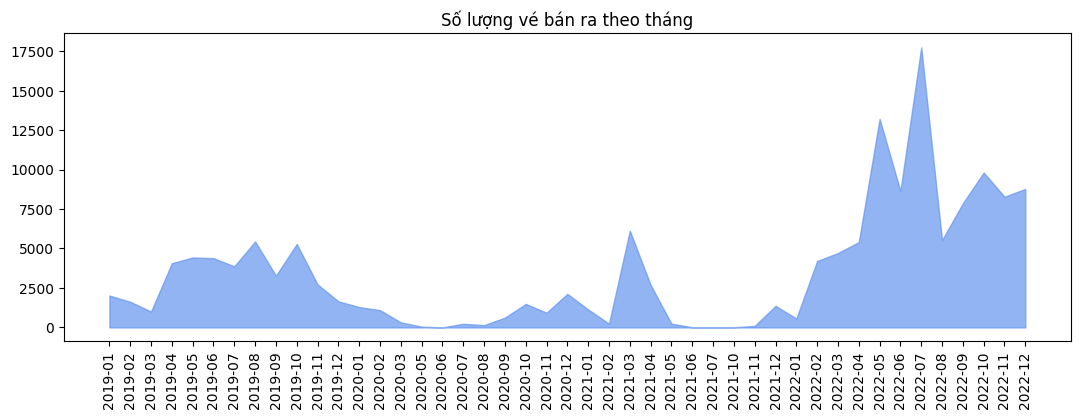

In [44]:
plt.figure(figsize= (13,4))
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo tháng')
plt.xticks(rotation= 90)

Data không có đủ chuỗi thời gian (thiếu tháng 04/2020, 08 - 09/2021 -> tạo chuỗi thời gian đầy đủ

In [45]:
start_date = '2019-01-01'
end_date = '2022-12-31'

data_range = pd.date_range(start_date, end_date, freq= 'MS')
month_range = data_range.month
month_name = data_range.strftime('%B')
year_range = data_range.year
month_year = data_range.strftime('%Y-%m')
month_year

Index(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
      dtype='object')

In [46]:
dim_time = pd.DataFrame({'month_number' : month_range,
            'month_name' : month_name,
            'year' : year_range,
            'month_year' : month_year})
dim_time.head()

,month_number,month_name,year,month_year
0,1,January,2019,2019-01
1,2,February,2019,2019-02
2,3,March,2019,2019-03
3,4,April,2019,2019-04
4,5,May,2019,2019-05


In [47]:
join_all = pd.merge(dim_time, join_all, how= 'left', on= 'month_year')
join_all

,month_number,month_name,year,month_year,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,...,dob,model,platform,campaign_type,description,error_group,age,month,name_day,hour
0,1,January,2019,2019-01,8a7f2cab8756e57def04ada487e988fd,100464.0,bank account,160.0,12fb2c927e118974e5760da6d23774f0,8.25,...,1988-05-17,HUAWEI ANE-LX2,mobile,voucher,Order successful,unknown,37.0,1.0,Thursday,18.0
1,1,January,2019,2019-01,c7ea0f76d90e2a53108b257d3a9f7b99,107065.0,money in app,92.0,5ab191f6212c82c12447b7b3e1d89275,10.31,...,1994-05-24,"iPhone5,2",mobile,reward point,Order successful,unknown,31.0,1.0,Thursday,19.0
2,1,January,2019,2019-01,379c51d5915607e94a375f9d9bdab650,107210.0,credit card,92.0,9ef86913f4326010ebb63e2df8f144a9,12.78,...,1988-11-06,"iPhone10,5",mobile,voucher,Order successful,unknown,36.0,1.0,Tuesday,18.0
3,1,January,2019,2019-01,c72ee7e76b5c6c02a389481c35e1ee36,115091.0,bank account,125.0,129d52f9d9c21ef98f498af31f8ea690,10.31,...,1993-09-04,OPPO A1601,mobile,unknown,Order successful,unknown,31.0,1.0,Thursday,14.0
4,1,January,2019,2019-01,1ffcca5b242a94833488457c9c23dc66,128429.0,bank account,121.0,715ad91099e6e77f8c121ad77849a87c,8.25,...,1995-06-26,"iPhone9,1",mobile,unknown,Insufficient funds in customer account. Please...,customer,30.0,1.0,Wednesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154723,12,December,2022,2022-12,cfa46dbde92afb880a4861027277168e,186572.0,money in app,7.0,bc61f7523bb2e4a2e3c865f95fd98ed8,5.57,...,2000-12-06,browser,website,direct discount,Order successful,unknown,24.0,12.0,Sunday,7.0
154724,12,December,2022,2022-12,b55ad1c647b78aac0e858dc17d089ac0,194575.0,money in app,148.0,2804f4c13616bf97dad9c13b97333e5a,5.16,...,1996-09-04,"iPhone12,1",mobile,direct discount,Order successful,unknown,28.0,12.0,Saturday,16.0
154725,12,December,2022,2022-12,243c710cad00e45b30bc0fb1596bc606,214308.0,money in app,9.0,47fc57f51e36aa9b7862eb2a6b4f5fa5,11.55,...,2002-07-14,"iPhone8,1",mobile,unknown,Order successful,unknown,23.0,12.0,Thursday,10.0
154726,12,December,2022,2022-12,6b99d136ec4d651404df1ba7298d771f,214523.0,money in app,5.0,f37dc8a3a5cca1ca439fb469248c308b,5.16,...,2000-09-08,browser,website,direct discount,Order successful,unknown,24.0,12.0,Sunday,11.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-05'),
  Text(17, 0, '2020-06'),
  Text(18, 0, '2020-07'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-09'),
  Text(21, 0, '2020-10'),
  Text(22, 0, '2020-11'),
  Text(23, 0, '2020-12'),
  Text(24, 0, '2021-01'),
  Text(25, 0, '2021-02'),
  Text(26, 0, '2021-03'),
  Text(27, 0, '2021-04'),
  T

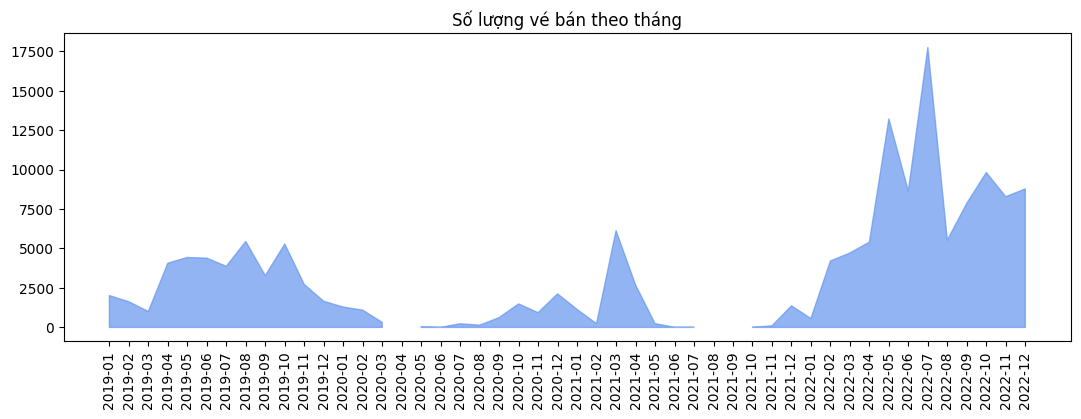

In [48]:
df_month_year = join_all.groupby('month_year').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_month_year

#Thay thế các giá trị 0 thành NA
df_month_year.replace(0, np.nan, inplace = True) 

plt.figure(figsize= (13,4))
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán theo tháng')
plt.xticks(rotation= 90)

Biểu đồ theo tuần

In [49]:
df_week_day = join_all.groupby('name_day').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_week_day

#Xác định thứ tự order
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_week_day['name_day'] = pd.Categorical(df_week_day['name_day'], categories = week_order, ordered = True)
df_week_day.sort_values('name_day', inplace = True)
df_week_day

,name_day,total_ticket
1,Monday,16702
5,Tuesday,14793
6,Wednesday,16281
4,Thursday,19101
0,Friday,26438
2,Saturday,34450
3,Sunday,26960


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

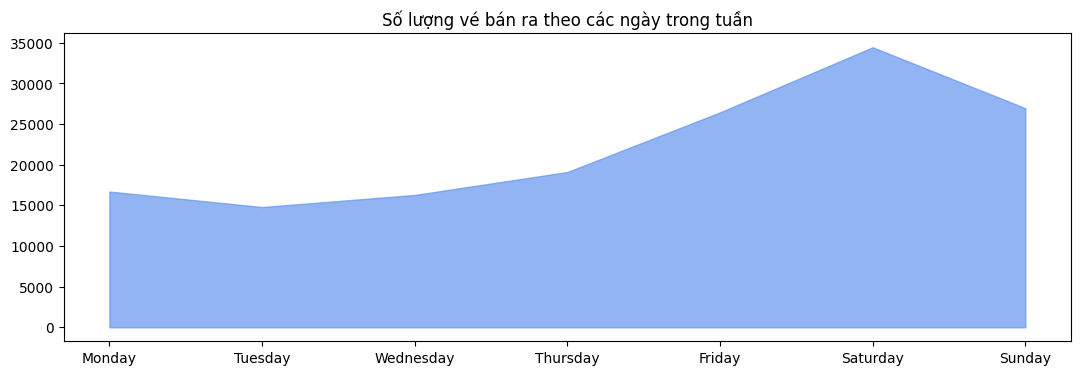

In [50]:
plt.figure(figsize= (13,4))
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo các ngày trong tuần')
plt.xticks(rotation= 0)

Vẽ biểu đồ theo giờ

In [51]:
df_hour = join_all.groupby('hour').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_hour

,hour,total_ticket
0,0.0,2352
1,1.0,964
2,2.0,398
3,3.0,159
4,4.0,74
5,5.0,146
6,6.0,536
7,7.0,1473
8,8.0,3865
9,9.0,7111


([<matplotlib.axis.XTick at 0x26296d3bf50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

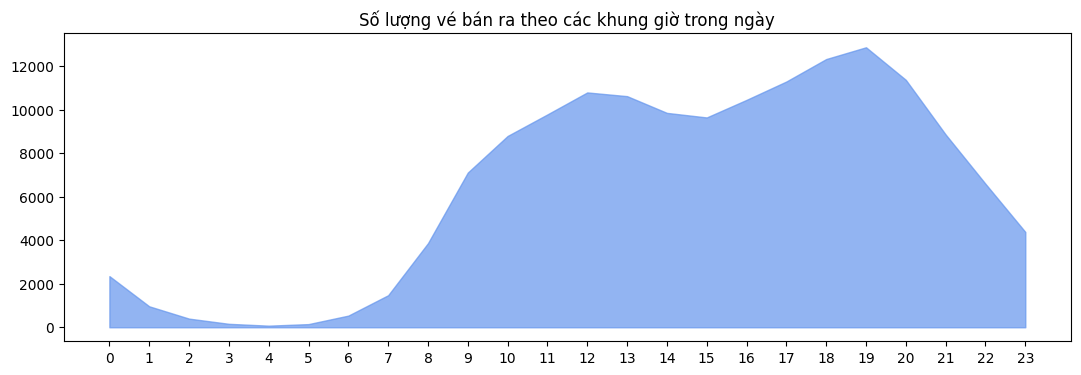

In [52]:
plt.figure(figsize= (13,4))
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo các khung giờ trong ngày')
plt.xticks(rotation= 0)
xvalue = [i for i in range(24)]
plt.xticks(xvalue)

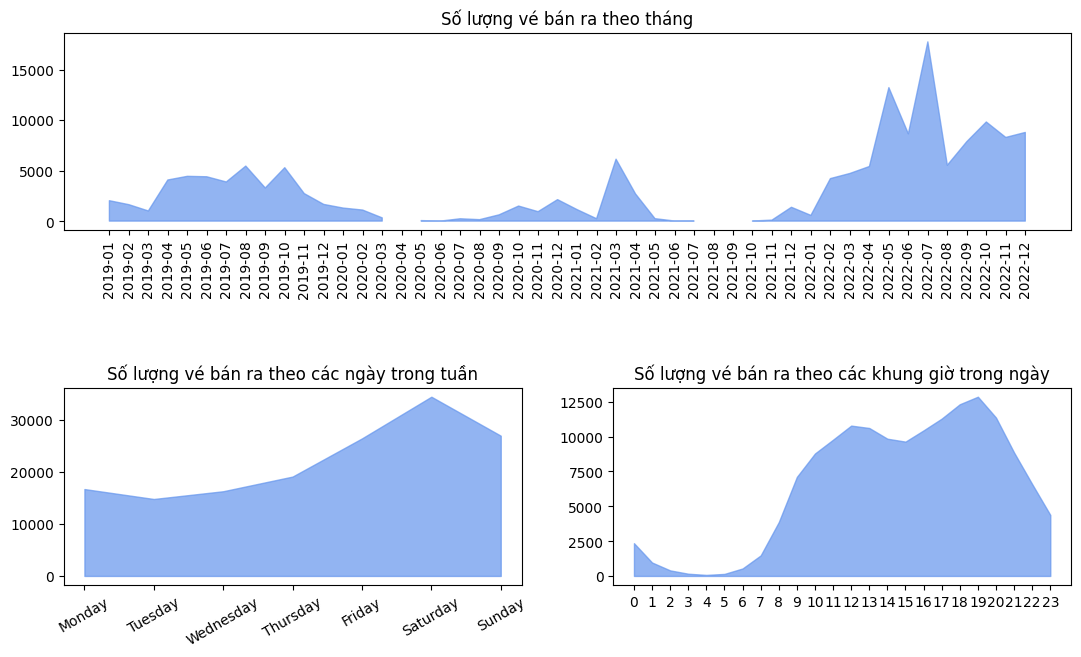

In [53]:
plt.figure(figsize= (13,8))

ax1 = plt.subplot(2,1,1)
plt.fill_between(df_month_year['month_year'],df_month_year['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo tháng')
plt.xticks(rotation= 90)

ax2 = plt.subplot(2,2,3)
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo các ngày trong tuần')
plt.xticks(rotation= 30)

ax3 = plt.subplot(2,2,4)
plt.fill_between(df_hour['hour'],df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('Số lượng vé bán ra theo các khung giờ trong ngày')
plt.xticks(rotation= 0)
xvalue = [i for i in range(24)]
plt.xticks(xvalue)

plt.subplots_adjust(hspace= 0.8, top= 0.8)

Nhìn chung, sau khi đại dịch Covid 19 kết thúc, tổng lượng vé xem phim bán ra tăng mạnh hơn so với khoảng thời gian trước dịch.
Khách hàng mua vé xem phim nhiều nhất vào khoảng thời gian cuối tuần (từ Thứ 5 đến Chủ Nhật) và khung thời gian được ưa thích nhất là từ khoảng 9h sáng đến 22h tối.

### Platform

In [54]:
#Vẽ biểu đồ thể hiện tổng lượng vé được đặt theo platform
df_platform = join_all[join_all['platform']!= 'unknown'].groupby('platform').agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, 'Tỷ trọng đặt vé trên các nền tảng')

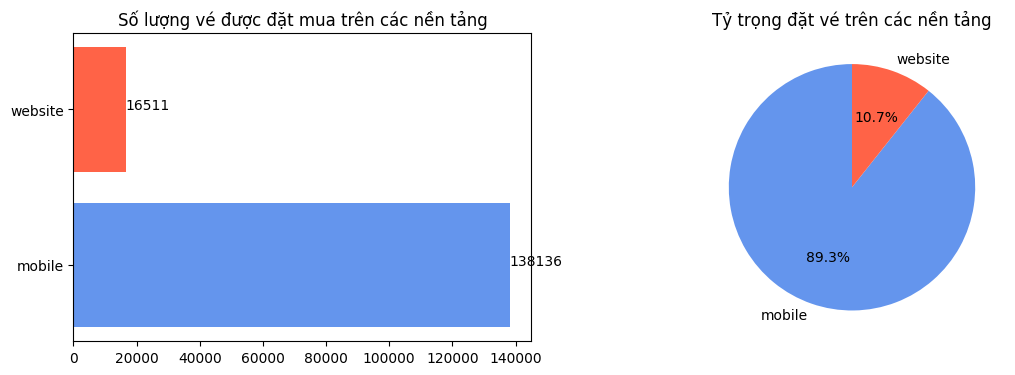

In [55]:
plt.figure(figsize= (13,4))

ax1= plt.subplot(1,2,1)
plt.barh(df_platform['platform'], df_platform['total_ticket'], color= ['cornflowerblue','tomato'])
plt.title('Số lượng vé được đặt mua trên các nền tảng')
for index, value in enumerate (df_platform['total_ticket']):
    plt.text(value,index,str(value))

ax1= plt.subplot(1,2,2)
plt.pie(df_platform['total_ticket'], labels= df_platform['platform'],colors= ['cornflowerblue','tomato'], autopct= '%1.1f%%', startangle= 90)
plt.title('Tỷ trọng đặt vé trên các nền tảng')

In [56]:
df_platform_time = join_all[join_all['platform']!= 'unknown'].groupby(['month_year','platform']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_platform_time

,month_year,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430
...,...,...,...
66,2022-10,website,1849
67,2022-11,mobile,6677
68,2022-11,website,1603
69,2022-12,mobile,6959


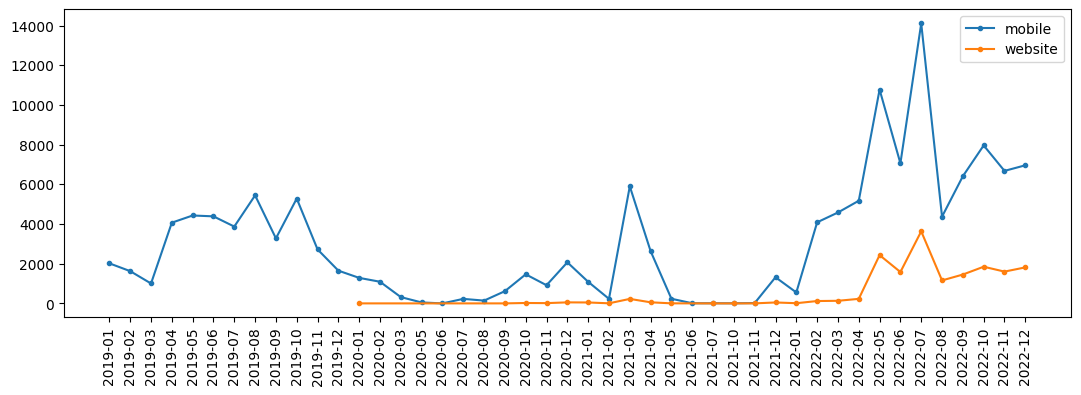

In [57]:
plt.figure(figsize=(13,4))

df_mobile_line = df_platform_time[df_platform_time['platform']== 'mobile'] 
plt.plot(df_mobile_line['month_year'],df_mobile_line['total_ticket'], label = 'mobile', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_website_line = df_platform_time[df_platform_time['platform']== 'website'] 
plt.plot(df_website_line['month_year'],df_website_line['total_ticket'], label = 'website', marker= 'o', markersize= 3)

plt.xticks(rotation= 90)
plt.legend()

Từ đầu năm 2020, dữ liệu bắt đầu ghi nhận khách hàng đặt vé trên nền tảng website, tuy nhiên số lượng vé không đáng kể, chiếm 11% trong tổng số lượng vé đặt online.
Trong khi đó, người dùng ưa thích việc sử dụng các thiết bị mobile đặt vé chiếm 89% tổng lượng khách hàng và đặc biệt tăng mạnh trong khoảng thời gian sau dịch Covid 19.

### Device Version

In [58]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154728 entries, 0 to 154727
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   month_number    154728 non-null  int32         
 1   month_name      154728 non-null  object        
 2   year            154728 non-null  int32         
 3   month_year      154728 non-null  object        
 4   ticket_id       154725 non-null  object        
 5   customer_id     154725 non-null  float64       
 6   paying_method   154725 non-null  object        
 7   theater_name    154725 non-null  float64       
 8   device_number   154725 non-null  object        
 9   original_price  154725 non-null  float64       
 10  discount_value  154725 non-null  float64       
 11  final_price     154725 non-null  float64       
 12  time            154725 non-null  datetime64[ns]
 13  status_id       154725 non-null  float64       
 14  campaign_id     154725 non-null  flo

In [59]:
join_all['os_version'] = join_all['model'].astype(str).apply(lambda x: 'IOS' if ('iPhone' in x or 'iPod' in x or 'iPad' in x)
                                                    else 'browser' if 'browser' in x
                                                    else 'unknown' if ('devicemodel' in x or'unknown' in x)
                                                    else 'android & other')
df_os = join_all.groupby(['os_version']).agg(total_ticket= ('ticket_id', 'count')).sort_values(by= 'total_ticket').reset_index()
df_os

,os_version,total_ticket
0,browser,13377
1,android & other,20934
2,IOS,51560
3,unknown,68854


Text(0.5, 1.0, 'Tỷ trọng người dùng đặt vé trên các thiết bị')

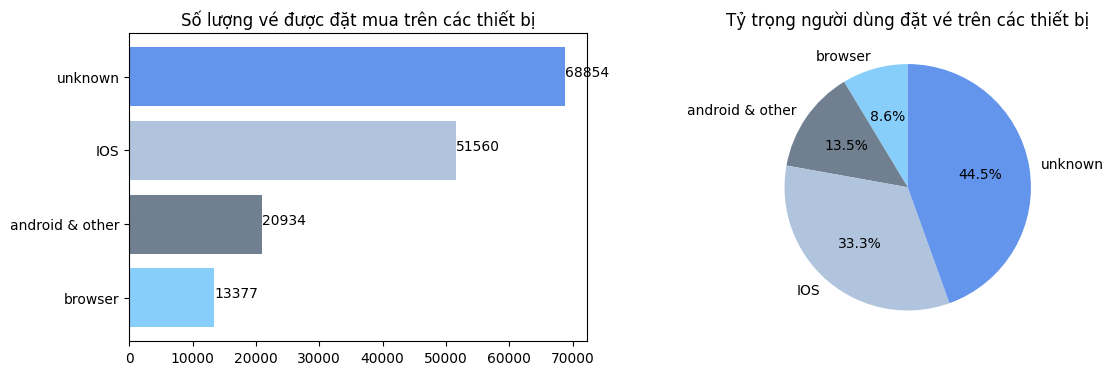

In [60]:
plt.figure(figsize= (13,4))

ax1= plt.subplot(1,2,1)
plt.barh(df_os['os_version'], df_os['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Số lượng vé được đặt mua trên các thiết bị')
for index, value in enumerate (df_os['total_ticket']):
    plt.text(value,index,str(value))

ax2= plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Tỷ trọng người dùng đặt vé trên các thiết bị')

os_version month_year     IOS  android & other  browser  unknown
0             2019-01  1243.0            703.0      NaN     73.0
1             2019-02  1079.0            537.0      NaN     10.0
2             2019-03   636.0            366.0      NaN      2.0
3             2019-04  2556.0           1504.0      NaN      9.0
4             2019-05  2849.0           1578.0      NaN      3.0
5             2019-06  2814.0           1569.0      NaN      4.0
6             2019-07  2514.0           1358.0      NaN      NaN
7             2019-08  3657.0           1782.0      NaN      5.0
8             2019-09  2162.0           1111.0      NaN      5.0
9             2019-10  3325.0           1952.0      NaN      7.0
10            2019-11  1783.0            939.0      NaN      NaN
11            2019-12  1185.0            465.0      NaN      1.0
12            2020-01   901.0            386.0      NaN      2.0
13            2020-02   791.0            301.0      NaN      NaN
14            2020-03   2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12'),
  Text(12, 0, '2020-01'),
  Text(13, 0, '2020-02'),
  Text(14, 0, '2020-03'),
  Text(15, 0, '2020-04'),
  Text(16, 0, '2020-05'),
  Text(17, 0, '2020-06'),
  Text(18, 0, '2020-07'),
  Text(19, 0, '2020-08'),
  Text(20, 0, '2020-09'),
  Text(21, 0, '2020-10'),
  Text(22, 0, '2020-11'),
  Text(23, 0, '2020-12'),
  Text(24, 0, '2021-01'),
  Text(25, 0, '2021-02'),
  Text(26, 0, '2021-03'),
  Text(27, 0, '2021-04'),
  T

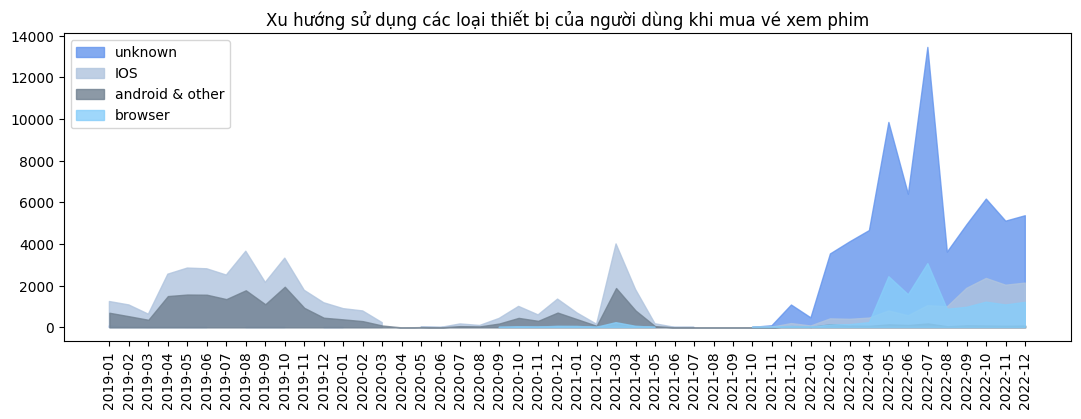

In [61]:
df_os_time = join_all.pivot_table(index= 'month_year', columns ='os_version', aggfunc= 'count', values= 'ticket_id').reset_index()
print(df_os_time)

plt.figure(figsize= (13,4))
plt.fill_between(df_os_time['month_year'],df_os_time['unknown'], color= 'cornflowerblue', alpha= 0.8, label= 'unknown')
plt.fill_between(df_os_time['month_year'],df_os_time['IOS'], color= 'lightsteelblue', alpha= 0.8, label= 'IOS')
plt.fill_between(df_os_time['month_year'],df_os_time['android & other'], color= 'slategrey', alpha= 0.8, label= 'android & other')
plt.fill_between(df_os_time['month_year'],df_os_time['browser'], color= 'lightskyblue', alpha= 0.8, label= 'browser')
plt.legend(loc= "upper left")
plt.title('Xu hướng sử dụng các loại thiết bị của người dùng khi mua vé xem phim')
plt.xticks(rotation = 90)


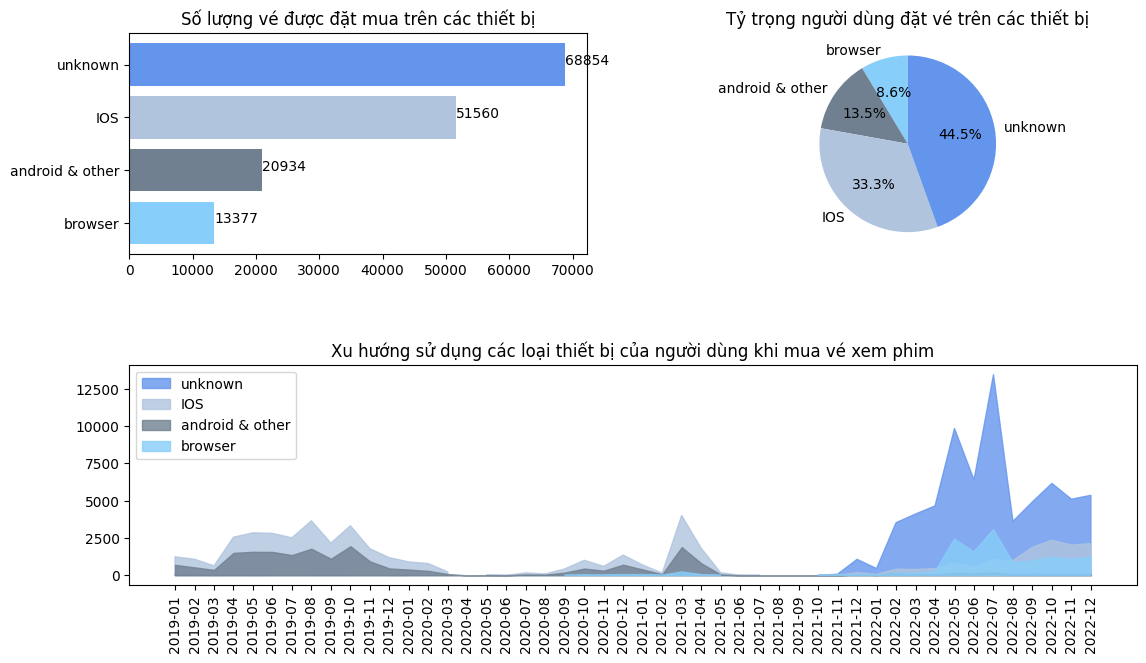

In [62]:
plt.figure(figsize= (13,8))

ax1= plt.subplot(2,2,1)
plt.barh(df_os['os_version'], df_os['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Số lượng vé được đặt mua trên các thiết bị')
for index, value in enumerate (df_os['total_ticket']):
    plt.text(value,index,str(value))

ax2= plt.subplot(2,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Tỷ trọng người dùng đặt vé trên các thiết bị')

ax3= plt.subplot(2,1,2)
plt.fill_between(df_os_time['month_year'],df_os_time['unknown'], color= 'cornflowerblue', alpha= 0.8, label= 'unknown')
plt.fill_between(df_os_time['month_year'],df_os_time['IOS'], color= 'lightsteelblue', alpha= 0.8, label= 'IOS')
plt.fill_between(df_os_time['month_year'],df_os_time['android & other'], color= 'slategrey', alpha= 0.8, label= 'android & other')
plt.fill_between(df_os_time['month_year'],df_os_time['browser'], color= 'lightskyblue', alpha= 0.8, label= 'browser')
plt.legend(loc= "upper left")
plt.title('Xu hướng sử dụng các loại thiết bị của người dùng khi mua vé xem phim')
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace= 0.5, top= 0.8)

### Payment Method

In [63]:
df_payment= join_all[join_all['paying_method'] != 'other'].groupby(['paying_method']).agg(total_ticket= ('ticket_id', 'count')).reset_index().sort_values(by= 'total_ticket')
df_payment

,paying_method,total_ticket
2,debit card,15680
1,credit card,19820
0,bank account,52643
3,money in app,66580


In [64]:
df_payment_time= join_all[join_all['paying_method'] != 'other'].groupby(['month_year','paying_method']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_payment_time.fillna(0, inplace= True)

In [65]:
df_payment_pivot = df_payment_time.pivot_table(index= 'month_year', columns= 'paying_method', aggfunc= 'sum', values= 'total_ticket').reset_index()
df_payment_pivot['total'] = df_payment_pivot.iloc[:, 1:5].sum(axis=1)

for i in df_payment_pivot.columns[1:5]:
    df_payment_pivot[i+'_pct']= df_payment_pivot[i]/df_payment_pivot['total'] 

df_payment_pivot['pct'] = df_payment_pivot.iloc[:, 6:10].sum(axis=1)
df_payment_pivot.fillna(0, inplace= True)

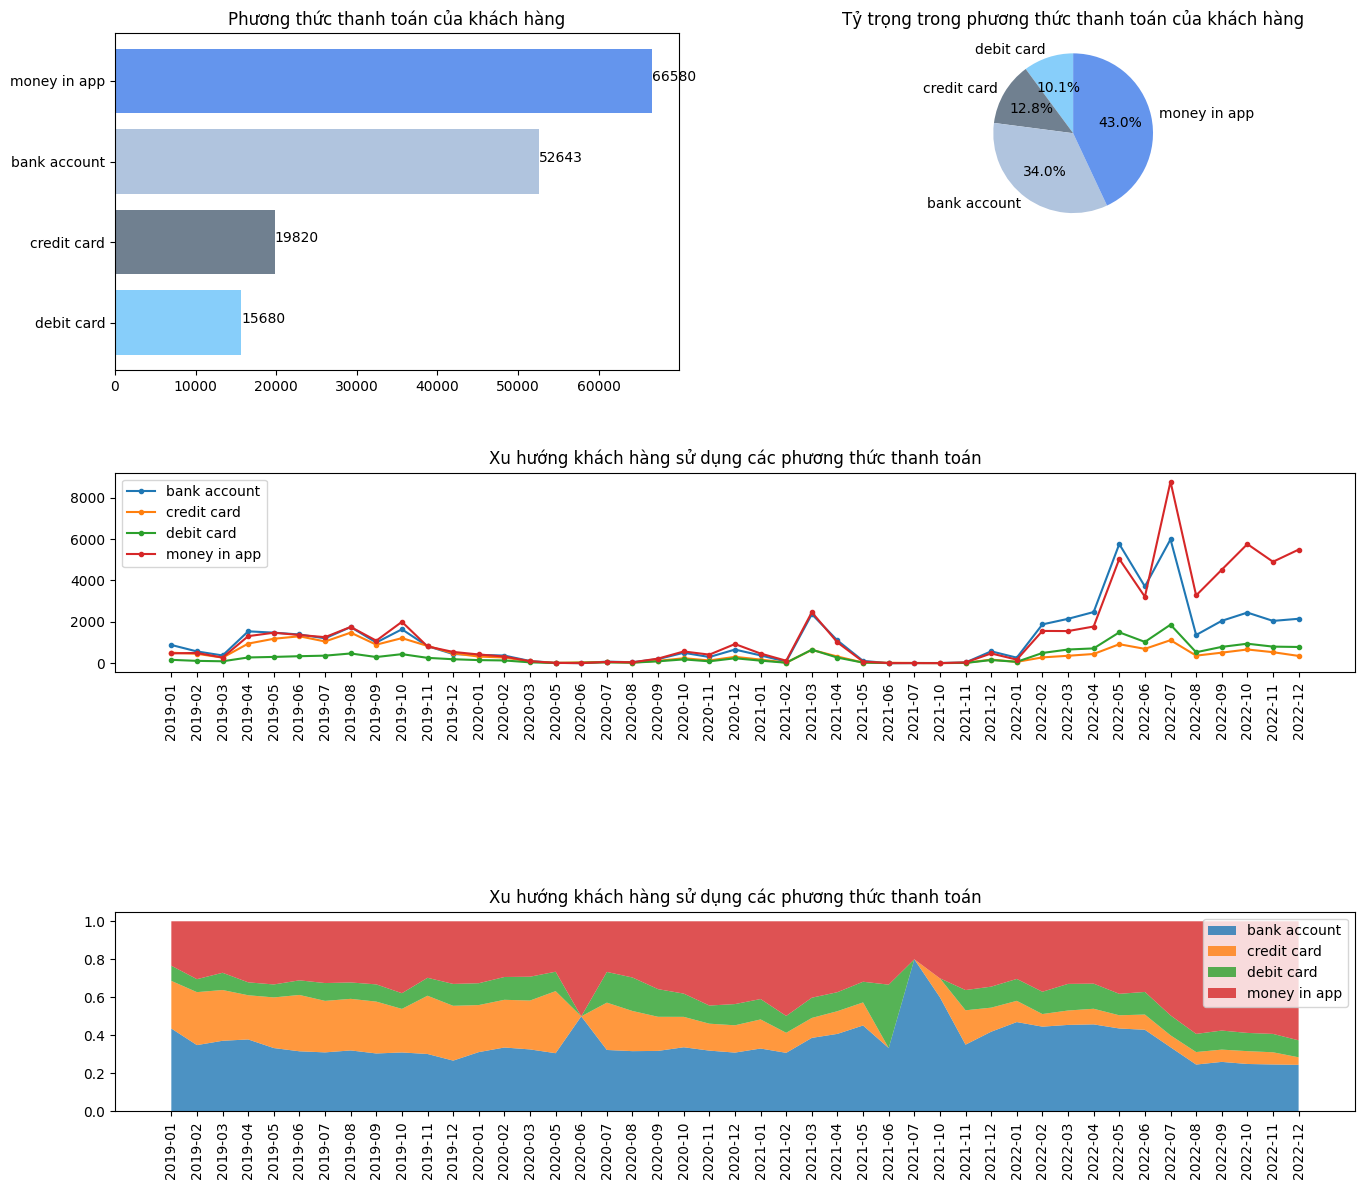

In [66]:
plt.figure(figsize= (16,14))

ax1= plt.subplot(2,2,1)
plt.barh(df_payment['paying_method'], df_payment['total_ticket'], color= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'])
plt.title('Phương thức thanh toán của khách hàng')
for index, value in enumerate (df_payment['total_ticket']):
    plt.text(value,index,str(value))


ax2= plt.subplot(3,2,2)
plt.pie(df_payment['total_ticket'], labels= df_payment['paying_method'],colors= ['lightskyblue','slategrey','lightsteelblue','cornflowerblue'], autopct= '%1.1f%%', startangle= 90)
plt.title('Tỷ trọng trong phương thức thanh toán của khách hàng')


ax3= plt.subplot(3,1,2)
df_bank_account_line = df_payment_time[df_payment_time['paying_method']== 'bank account'] 
plt.plot(df_bank_account_line['month_year'],df_bank_account_line['total_ticket'], label = 'bank account', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_credit_card_line = df_payment_time[df_payment_time['paying_method']== 'credit card'] 
plt.plot(df_credit_card_line['month_year'],df_credit_card_line['total_ticket'], label = 'credit card', marker= 'o', markersize= 3)

df_debit_card_line = df_payment_time[df_payment_time['paying_method']== 'debit card'] 
plt.plot(df_debit_card_line['month_year'],df_debit_card_line['total_ticket'], label = 'debit card', marker= 'o', markersize= 3)
plt.xticks(rotation= 90)

df_money_in_app_line = df_payment_time[df_payment_time['paying_method']== 'money in app'] 
plt.plot(df_money_in_app_line['month_year'],df_money_in_app_line['total_ticket'], label = 'money in app', marker= 'o', markersize= 3)

plt.title('Xu hướng khách hàng sử dụng các phương thức thanh toán')
plt.xticks(rotation= 90)
plt.legend()


ax3= plt.subplot(3,1,3)
plt.stackplot(df_payment_pivot['month_year'], df_payment_pivot['bank account_pct'],df_payment_pivot['credit card_pct'],df_payment_pivot['debit card_pct'],df_payment_pivot['money in app_pct'],
             labels= ['bank account','credit card','debit card', 'money in app'], alpha= 0.8)
plt.xticks(rotation= 90)
plt.legend()
plt.title('Xu hướng khách hàng sử dụng các phương thức thanh toán')

plt.subplots_adjust(hspace= 1.2)

- Users tend to use money in app to pay for their tickets, with money in app and bank accounts being the most common payment methods.
- Meanwhile, payment by credit card is less preferred and tends to decline gradually.

### Promotion

In [67]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154728 entries, 0 to 154727
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   month_number    154728 non-null  int32         
 1   month_name      154728 non-null  object        
 2   year            154728 non-null  int32         
 3   month_year      154728 non-null  object        
 4   ticket_id       154725 non-null  object        
 5   customer_id     154725 non-null  float64       
 6   paying_method   154725 non-null  object        
 7   theater_name    154725 non-null  float64       
 8   device_number   154725 non-null  object        
 9   original_price  154725 non-null  float64       
 10  discount_value  154725 non-null  float64       
 11  final_price     154725 non-null  float64       
 12  time            154725 non-null  datetime64[ns]
 13  status_id       154725 non-null  float64       
 14  campaign_id     154725 non-null  flo

In [68]:
df_pro= join_all.groupby(['month_year','campaign_type']).agg(total_ticket= ('ticket_id', 'count')).reset_index()
df_pro

,month_year,campaign_type,total_ticket
0,2019-01,reward point,934
1,2019-01,unknown,914
2,2019-01,voucher,171
3,2019-02,unknown,1522
4,2019-02,voucher,104
...,...,...,...
112,2022-11,unknown,2815
113,2022-11,voucher,156
114,2022-12,direct discount,4416
115,2022-12,unknown,3886
